In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [9]:
import os
import pandas as pd
from torch.utils.data import TensorDataset, random_split
import matplotlib.pyplot as plt
import torch.nn.functional as nnf

In [10]:
def generate_attention_attention_layers_per_head_for_word(word,attention_map_df):
  import ast
  frames = []
  #len(attention_map_df[attention_map_df["word"]==word]["attention_map"].values)
  for i in attention_map_df[attention_map_df["word"]==word]["attention_map"].values:
    frames.append(pd.DataFrame.from_dict(ast.literal_eval(i)))
  res = pd.concat(frames)
  res = res.fillna(0)
  res = res.groupby(res.index).mean()
  return res

In [11]:
## read attetnion_weigths_Twitter_fine_tuned_most_common_words

attetnion_weigths_Twitter_fine_tuned_most_common_pos_words = pd.read_csv("attention_maps/bert_with_fine_tuning/kaggle_BERT_Fine_Tuning_most_pos_words_attetnion_weights_IG")

In [12]:
## read attetnion_weigths_Twitter_fine_tuned_most_common_neg_words

attetnion_weigths_Twitter_fine_tuned_most_common_neg_words = pd.read_csv("attention_maps/bert_with_fine_tuning/kaggle_BERT_Fine_Tuning_most_neg_words_attetnion_weights_IG", index_col=False)

In [13]:
## read attetnion_weigths_Twitter_without_fine_tuned_most_common_pos_words

attetnion_weigths_Twitter_without_fine_tuned_most_common_pos_words = pd.read_csv("attention_maps/bert_without_fine_tuning/kaggle_without_Fine_tuning_most_pos_words_attetnion_weights_IG", index_col=False)

In [14]:
## read attetnion_weigths_Twitter_without_fine_tuned_most_common_neg_words

attetnion_weigths_Twitter_without_fine_tuned_most_common_neg_words = pd.read_csv("attention_maps/bert_without_fine_tuning/kaggle_without_Fine_tuning_most_neg_words_attetnion_weights_IG", index_col=False)

## Most important positive words between fne-tuned and non-fine tuned BERT

['foul', 'arrogant', 'cared', 'economy', 'nicole']
foul
arrogant
cared
economy
nicole


<Figure size 432x288 with 0 Axes>

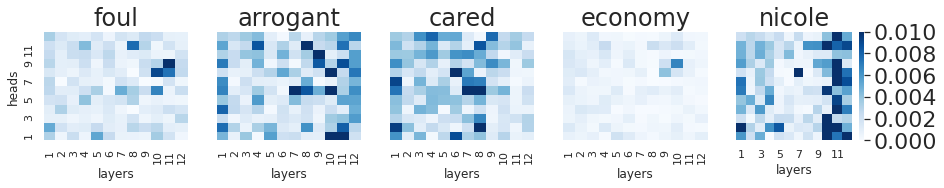

In [15]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized = ["foul", "arrogant", "cared", "economy", "nicole"]
fig1 = plt.figure()
fig,axs = plt.subplots(figsize=(15,2),ncols=len(most_common_5_tp_tokenized))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  print(i)
  res = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_fine_tuned_most_common_pos_words)
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  if indx==0:
    sns.set(font_scale=2)
    sns.heatmap(res, ax=axs[indx], cbar=False, cmap="Blues")
    axs[indx].set_title(i)
    axs[indx].set(ylabel='heads',xlabel='layers')
    #axs[indx].set_xlabel('layers', fontsize = 14)
   # axs[indx].set_xticklabels(np.arange(12), fontsize=12) 
    #axs[indx].set_ylabel('heads', fontsize = 14)
   # axs[indx].set_yticklabels(np.arange(12), fontsize=12) 
    axs[indx].invert_yaxis()
  elif indx == (len(most_common_5_tp_tokenized) - 1):
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=True, cmap="Blues",vmin=0, vmax=0.01)

    axs[indx].set_title(i)
    axs[indx].set_xlabel('layers')
    axs[indx].invert_yaxis()
    #axs[indx].set_xticklabels(np.arange(12), fontsize=12) 
    #asx[indx].set_yticklabels(np.arange(12), fontsize=12) 
    #axs[indx].set(xlabel='layers',fontsize=14)
  else:
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=False, cmap="Blues",vmin=0, vmax=0.01)

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set_xlabel('layers')
    #axs[indx].set_xticklabels(np.arange(12), fontsize=12) 
    #axs[indx].set_yticklabels(np.arange(12), fontsize=12) 
    #axs[indx].set(xlabel='layers',fontsize=14)

In [16]:
fig.savefig("kaggle_BERT_Fine_Tuning_most_pos_words_attetnion_weights_IG.eps", format='eps',bbox_inches='tight') 

['foul', 'arrogant', 'cared', 'economy', 'nicole']
foul
arrogant
cared
economy
nicole


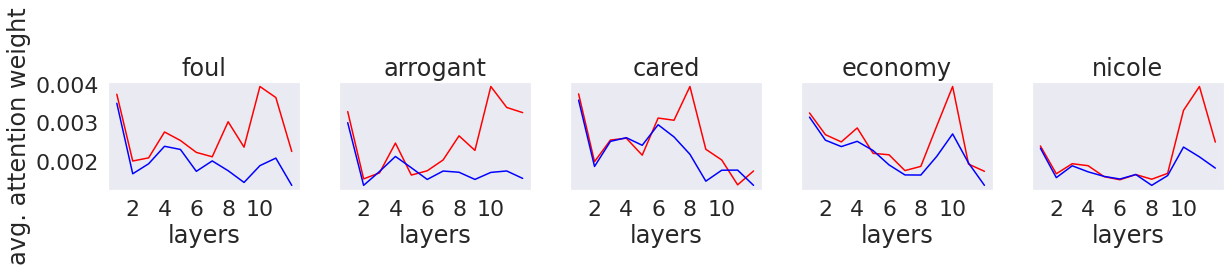

In [17]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized =  ["foul", "arrogant", "cared", "economy", "nicole"]
fig, axs = plt.subplots(nrows=1, ncols=len(most_common_5_tp_tokenized), figsize=(20, 2))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  layers = []
  print(i)
  res_ft = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_fine_tuned_most_common_pos_words).transpose()
  res_wft = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_without_fine_tuned_most_common_pos_words).transpose()
  avg_head_res_ft = res_ft.mean(axis=1).values
  avg_head_res_wft = res_wft.mean(axis=1).values
  layers = res_ft.index.values
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  sns.set(font_scale=2)
  if indx==0:  
    axs[indx].set_title(str(i))
    axs[indx].set_xticks(np.arange(12,step=2))
    axs[indx].set_yticks(np.arange(0,0.01,0.001))
    axs[indx].set_xlabel("layers")
    axs[indx].set_ylabel("avg. attention weight")
    axs[indx].plot(layers,avg_head_res_ft,color = 'red')
    axs[indx].plot(layers,avg_head_res_wft,color = 'blue')
    axs[indx].grid(False)
  
  else:   
    axs[indx].set_title(str(i))
    axs[indx].set_yticks([])
    axs[indx].set_xlabel("layers")
    axs[indx].set_xticks(np.arange(12,step=2))
    axs[indx].set_ylabel("")
    axs[indx].plot(layers,avg_head_res_ft,color = 'red')
    axs[indx].plot(layers,avg_head_res_wft,color = 'blue')
    axs[indx].grid(False)
fig.savefig("kaggle_BERT_Fine_Tuning_vs_No_Fine_Tuning_most_pos_words_attetnion_weights_IG.eps", format='eps',bbox_inches='tight') 


['foul', 'arrogant', 'cared', 'economy', 'nicole']
foul
arrogant
cared
economy
nicole


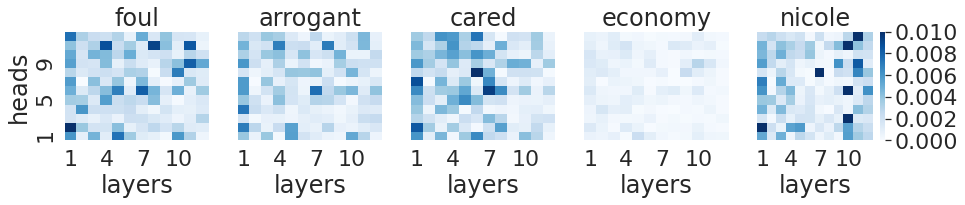

In [18]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized = ["foul", "arrogant", "cared", "economy", "nicole"]
fig, axs = plt.subplots(figsize=(15,2),ncols=len(most_common_5_tp_tokenized))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  print(i)
  res = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_without_fine_tuned_most_common_pos_words)
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  if indx==0:
    sns.set(font_scale=2)
    sns.heatmap(res, ax=axs[indx], cbar=False, cmap="Blues")
    axs[indx].set_title(i)
    axs[indx].set(ylabel='heads',xlabel='layers')
    axs[indx].invert_yaxis()
  elif indx == (len(most_common_5_tp_tokenized) - 1):
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=True, cmap="Blues",vmin=0, vmax=0.01)

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
  else:
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=False, cmap="Blues",vmin=0, vmax=0.01)

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
    
fig.savefig("kaggle_No_BERT_Fine_Tuning_most_pos_words_attetnion_weights_IG.eps", format='eps',bbox_inches='tight')       

## most important neagtive words in Fine tuned BERT and BERT without fine-tuning

['brother', 'hatred', 'bats', 'obsolete', 'blanket']
brother
hatred
bats
obsolete
blanket


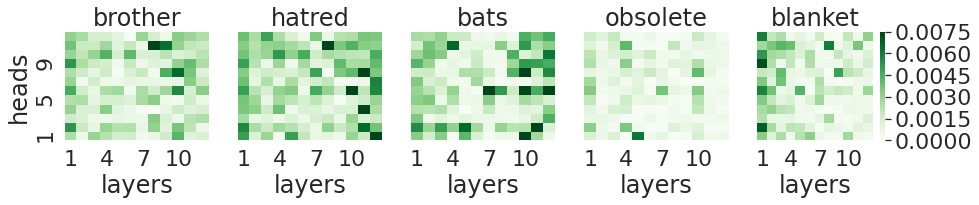

In [19]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized =  ["brother", "hatred", "bats", "obsolete", "blanket"]
fig, axs = plt.subplots(figsize=(15,2),ncols=len(most_common_5_tp_tokenized))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  print(i)
  res = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_fine_tuned_most_common_neg_words)
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  if indx==0:
    sns.set(font_scale=2)
    sns.heatmap(res, ax=axs[indx], cbar=False, cmap="Greens")
    axs[indx].set_title(i)
    axs[indx].set(ylabel='heads',xlabel='layers')
    axs[indx].invert_yaxis()
  elif indx == (len(most_common_5_tp_tokenized) - 1):
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=True,cmap="Greens",vmin=0, vmax=0.0075)

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
  else:
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=False, cmap="Greens",vmin=0, vmax=0.0075)

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
 
fig.savefig("kaggle_BERT_Fine_Tuning_most_neg_words_attetnion_weights_IG.eps", format='eps',bbox_inches='tight') 

['brother', 'hatred', 'bats', 'obsolete', 'blanket']
brother
hatred
bats
obsolete
blanket


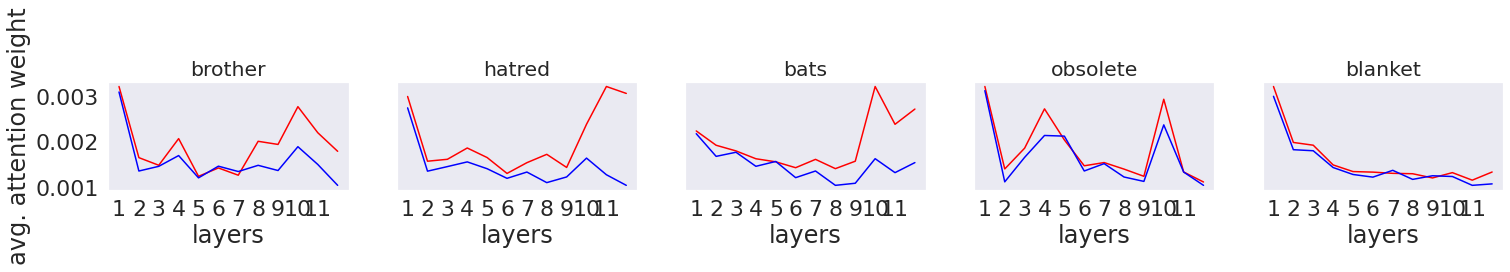

In [20]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized =  ["brother", "hatred", "bats", "obsolete", "blanket"]
fig, axs = plt.subplots(nrows=1, ncols=len(most_common_5_tp_tokenized), figsize=(25, 2))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  layers = []
  print(i)
  res_ft = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_fine_tuned_most_common_neg_words).transpose()
  res_wft = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_without_fine_tuned_most_common_neg_words).transpose()
  avg_head_res_ft = res_ft.mean(axis=1).values
  avg_head_res_wft = res_wft.mean(axis=1).values
  layers = res_ft.index.values
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  sns.set(font_scale=1.7)
  if indx==0:
    axs[indx].set_title(str(i))
    axs[indx].set_xticks(np.arange(12))
    axs[indx].set_xlabel("layers")
    axs[indx].set_ylabel("avg. attention weight")
    axs[indx].plot(layers,avg_head_res_ft,color = 'red')
    axs[indx].plot(layers,avg_head_res_wft,color = 'blue')
    axs[indx].grid(False)
  
  else:
    axs[indx].set_title(str(i))
    axs[indx].set_yticks([])
    axs[indx].set_xlabel("layers")
    axs[indx].set_xticks(np.arange(12))
    axs[indx].set_ylabel("")
    axs[indx].plot(layers,avg_head_res_ft,color = 'red')
    axs[indx].plot(layers,avg_head_res_wft,color = 'blue')
    axs[indx].grid(False)
    
fig.savefig("kaggle_BERT_Fine_Tuning_vs_No_Fine_Tuning_most_neg_words_attetnion_weights_IG.eps", format='eps', dpi=1200,bbox_inches='tight') 

['brother', 'hatred', 'bats', 'obsolete', 'blanket']
brother
hatred
bats
obsolete
blanket


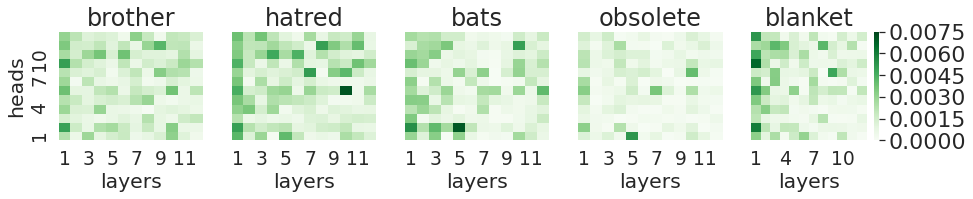

In [21]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized =  ["brother", "hatred", "bats", "obsolete", "blanket"]
fig, axs = plt.subplots(figsize=(15,2),ncols=len(most_common_5_tp_tokenized))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  print(i)
  res = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_without_fine_tuned_most_common_neg_words)
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  if indx==0:
    sns.set(font_scale=2)
    sns.heatmap(res, ax=axs[indx], cbar=False, cmap="Greens", vmin=0,  vmax=0.0075)
    axs[indx].set_title(i)
    axs[indx].set(ylabel='heads',xlabel='layers')
    axs[indx].invert_yaxis()
  elif indx == (len(most_common_5_tp_tokenized) - 1):
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=True, cmap="Greens", vmin=0, vmax=0.0075)

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
  else:
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=False, cmap="Greens", vmin=0, vmax=0.0075)

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
    
fig.savefig("kaggle_No_BERT_Fine_Tuning_most_neg_words_attetnion_weights_IG.eps", format='eps',bbox_inches='tight')           

## Special Tokens between Fine-tuned and non fined-tuned BERT

['[CLS]', '[SEP]']
[CLS]
[SEP]


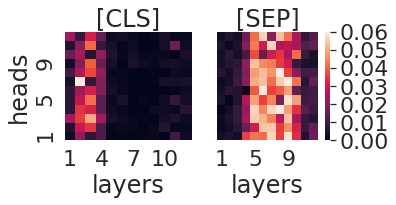

In [22]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized = ["[CLS]","[SEP]"]
fig, axs = plt.subplots(figsize=(5,2),ncols=len(most_common_5_tp_tokenized))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  print(i)
  res = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_fine_tuned_most_common_pos_words)
  indx = most_common_5_tp_tokenized.index(i)
  if indx==0:
    sns.set(font_scale=2)
    sns.heatmap(res, ax=axs[indx], cbar=False) #vmin=0, vmax=1
    axs[indx].set_title(i)
    axs[indx].set(ylabel='heads',xlabel='layers')
    axs[indx].invert_yaxis()
  elif indx == (len(most_common_5_tp_tokenized) - 1):
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=True,vmin=0, vmax=0.06)# 

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
  else:
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=False,vmin=0, vmax=0.06)# vmin=0, vmax=1

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
    
fig.savefig("kaggle_BERT_Fine_Tuning_special_tokens_attetnion_weights.eps", format='eps',bbox_inches='tight')            

['[CLS]', '[SEP]']
[CLS]
[SEP]


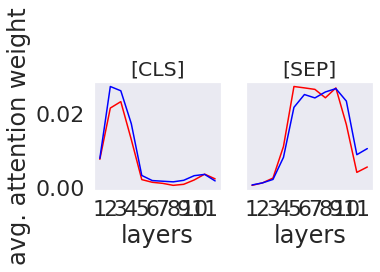

In [23]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized = ["[CLS]","[SEP]"]
fig, axs = plt.subplots(nrows=1, ncols=len(most_common_5_tp_tokenized), figsize=(5, 2))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  layers = []
  print(i)
  res_ft = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_fine_tuned_most_common_pos_words).transpose()
  res_wft = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_without_fine_tuned_most_common_pos_words).transpose()
  avg_head_res_ft = res_ft.mean(axis=1).values
  avg_head_res_wft = res_wft.mean(axis=1).values
  layers = res_ft.index.values
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  sns.set(font_scale=1.7)
  if indx==0:
    axs[indx].set_title(str(i))
    axs[indx].set_xticks(np.arange(12))
    axs[indx].set_xlabel("layers")
    axs[indx].set_ylabel("avg. attention weight")
    axs[indx].plot(layers,avg_head_res_ft,color = 'red')
    axs[indx].plot(layers,avg_head_res_wft,color = 'blue')
    axs[indx].grid(False)
  
  else:
    axs[indx].set_title(str(i))
    axs[indx].set_yticks([])
    axs[indx].set_xlabel("layers")
    axs[indx].set_xticks(np.arange(12))
    axs[indx].set_ylabel("")
    axs[indx].plot(layers,avg_head_res_ft,color = 'red')
    axs[indx].plot(layers,avg_head_res_wft,color = 'blue')
    axs[indx].grid(False)
    
fig.savefig("Twitter_sexism_BERT_Fine_Tuning_vs_No_Fine_Tuning_special_tokens_attetnion_weights.eps", format='eps', dpi=1200,bbox_inches='tight')           

['[CLS]', '[SEP]']
[CLS]
[SEP]


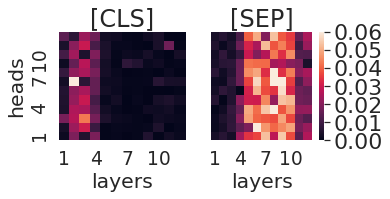

In [24]:
# Create sentence and label lists
import matplotlib.pyplot as plt
most_common_5_tp_tokenized = ["[CLS]","[SEP]"]
fig, axs = plt.subplots(figsize=(5,2),ncols=len(most_common_5_tp_tokenized))
#fig, axs = plt.subplots(ncols=len(sentences_tokenized[0]))
print(most_common_5_tp_tokenized)
for i in most_common_5_tp_tokenized:
  print(i)
  res = generate_attention_attention_layers_per_head_for_word(i,attetnion_weigths_Twitter_without_fine_tuned_most_common_pos_words)
  #print(res)
  indx = most_common_5_tp_tokenized.index(i)
  if indx==0:
    sns.set(font_scale=2)
    sns.heatmap(res, ax=axs[indx], cbar=False) #vmin=0, vmax=1
    axs[indx].set_title(i)
    axs[indx].set(ylabel='heads',xlabel='layers')
    axs[indx].invert_yaxis()
  elif indx == (len(most_common_5_tp_tokenized) - 1):
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=True,vmin=0, vmax=0.06) #vmin=0, vmax=1

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
  else:
    sns.set(font_scale=2)
    sns.heatmap(res,ax=axs[indx],annot=False, yticklabels=False,cbar=False, vmin=0, vmax=0.06)#vmin=0, vmax=1

    axs[indx].set_title(i)
    axs[indx].invert_yaxis()
    axs[indx].set(xlabel='layers')
    
fig.savefig("kaggle_NO_BERT_Fine_Tuning_special_tokens_attetnion_weights.eps", format='eps',bbox_inches='tight')                  